In [1]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt

In [9]:
file1 = sio.loadmat(r"\\wsl.localhost\Ubuntu\home\mnik\TSA-Net\TSA_Net_realdata\Data\Testing_real_data\scene1.mat")
file2 = sio.loadmat(r"\\wsl.localhost\Ubuntu\home\mnik\TSA-Net\TSA_Net_realdata\Result\Testing-Result\Recon_scene1.mat")

In [2]:
file1 = sio.loadmat(r"C:\Users\Nikhil\Downloads\training_data\scene1.mat")

In [3]:
file1

{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Thu Oct 17 15:16:18 2024',
 '__version__': '1.0',
 '__globals__': [],
 'img': array([[[5.3500e+02, 5.4100e+02, 4.3000e+02, ..., 3.7000e+01,
          3.6000e+01, 6.9000e+01],
         [7.1000e+01, 7.3000e+01, 5.8000e+01, ..., 1.4000e+01,
          1.1000e+01, 1.0000e+01],
         [5.1100e+02, 4.4200e+02, 3.5600e+02, ..., 5.9000e+02,
          1.4900e+02, 2.4500e+02],
         ...,
         [9.1280e+03, 9.1630e+03, 9.2080e+03, ..., 1.3260e+03,
          1.3040e+03, 1.2490e+03],
         [8.9480e+03, 9.0020e+03, 9.1590e+03, ..., 1.3130e+03,
          1.3670e+03, 1.2490e+03],
         [8.7820e+03, 8.8600e+03, 8.9470e+03, ..., 1.3390e+03,
          1.3600e+03, 1.2310e+03]],
 
        [[5.4600e+02, 5.4800e+02, 4.3700e+02, ..., 4.1000e+01,
          5.5000e+01, 4.2000e+01],
         [6.6000e+01, 6.7000e+01, 5.7000e+01, ..., 9.6100e+02,
          5.6000e+01, 4.4100e+02],
         [5.6000e+02, 4.9400e+02, 3.8900e+02, ..., 2.950

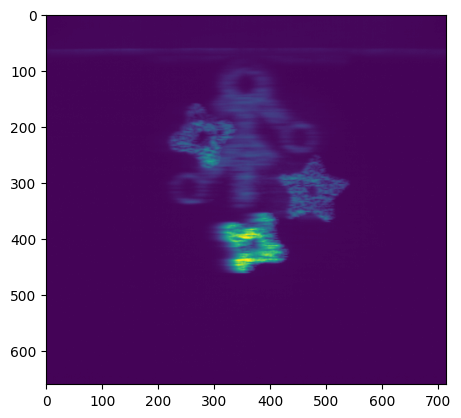

In [18]:
plt.imshow(file1["meas_real"])
plt.show()

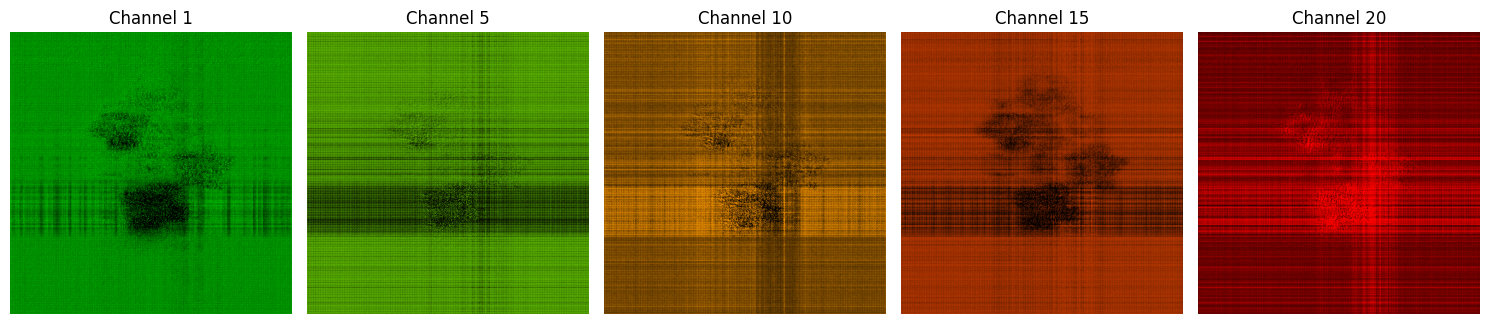

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Define channels to display
channels_to_display = [1, 5, 10, 15, 20]

# Create subplots
fig, axes = plt.subplots(1, len(channels_to_display), figsize=(15, 5))

# Define spectral colors similar to the reference image
spectral_colors = ['green', 'yellowgreen', 'orange', 'orangered', 'red']

for ax, channel, color in zip(axes, channels_to_display, spectral_colors):
    # Normalize the data
    channel_data = file2["recon"][:, :, channel]
    normalized_data = (channel_data - np.min(channel_data)) / (np.max(channel_data) - np.min(channel_data))
    
    # Create RGB image with single color channel tinting
    rgb_image = np.zeros((normalized_data.shape[0], normalized_data.shape[1], 3))
    
    if color == 'green':
        rgb_image[:,:,1] = normalized_data  # G channel
    elif color == 'yellowgreen':
        rgb_image[:,:,1] = normalized_data  # G channel
        rgb_image[:,:,0] = normalized_data * 0.5  # R channel partially
    elif color == 'orange':
        rgb_image[:,:,0] = normalized_data  # R channel
        rgb_image[:,:,1] = normalized_data * 0.6  # G channel partially
    elif color == 'orangered':
        rgb_image[:,:,0] = normalized_data  # R channel
        rgb_image[:,:,1] = normalized_data * 0.3  # G channel partially
    else:  # red
        rgb_image[:,:,0] = normalized_data  # R channel
    
    # Display the tinted image
    ax.imshow(rgb_image)
    ax.set_title(f'Channel {channel}')
    ax.axis('off')

plt.tight_layout()
plt.show()